Ilość punktów:4
x:1
y:2
x:2
y:-1
x:3
y:3
x:4
y:-2


Macierz trójdiagonalna: 
 [[4.0, 1.0], [1.0, 4.0]]


Macierz trójdiagonalna odwrócona: 
 [[ 0.26666667 -0.06666667]
 [-0.06666667  0.26666667]]



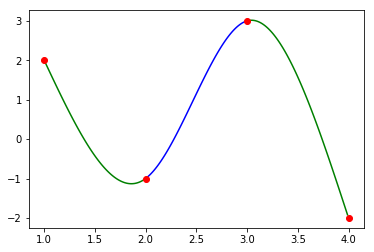

Wielomian 0 :  2.4666666666666663 (x - x 0 )^3 +  0.0 (x - x 0 )^2 +  -5.466666666666667 (x - x 0 ) +  2.0
Wielomian 1 :  -5.333333333333333 (x - x 1 )^3 +  7.3999999999999995 (x - x 1 )^2 +  1.9333333333333336 (x - x 1 ) +  -1.0
Wielomian 2 :  2.8666666666666667 (x - x 2 )^3 +  -8.6 (x - x 2 )^2 +  0.7333333333333334 (x - x 2 ) +  3.0


In [98]:
# 0. Import bibliotek
import numpy as np
from array import *
import pylab
import matplotlib.pyplot as plt
from decimal import getcontext, Decimal

# 1. Wprowadzenie punktów:
n = int(input("Ilość punktów:"))
tabX = []
tabY = []
for i in range (n):
    addX = float(input("x:"))
    tabX.append(addX)
    addY = float(input("y:"))
    tabY.append(addY)
    
print("")

# 2. Macierz trójdiagonalna:

# 2.1 Zdefiniowana
T = [[0.0] * (n-2) for i in range(n-2)]


for i in range (0,n-2):
    arr = [0] * (n-2)

        
    # 2.2 Diagonala
    arr[i] = 4.0
    
    # 2.3 Nad diagonalą
    if (i > n-4):
        pass
    else:
        arr[i+1] = 1.0
    
    # 2.4 Pod diagonalą
    if (i < 1):
        pass
    else:
        arr[i-1] = 1.0
    
    T[i] = arr
    
print("\nMacierz trójdiagonalna: \n",T)

# 3. Odwrócenie macierzy trójdiagonalnej:
print("\n")
T2 = np.linalg.inv(T)
print("Macierz trójdiagonalna odwrócona: \n",T2)

print("")


# 4. Stworzenie macierzy Y i wypełnienie wartościami
Y = [0.0] * (n-2)

for i in range (0, n-2):
    h = tabX[i+1] - tabX[i]
    Y[i] = int(tabY[i] - 2*tabY[i+1] + tabY[i+2]) * (6.0 / (h**2))


# 5. Przygotowanie 2 macierzy "Y2" i lewostronne mnożenie macierzy T2 i Y:
Y2 = [0.0] * (n-2)
mult = 0.0
for i in range (0, n-2):
    mult = 0.0
    for j in range (0, n-2):
        mult += Y[j] * T2[i][j]    
    Y2[i] = mult



# 6. Stworzenie macierzy M:
M = [0.0] * n
for i in range (1,n-1):
    M[i] = Y2[i-1]


#7. Współczynniki A,B,C,D dla kolejnych wielomianów:
A = [0.0] * (n-1)
B = [0.0] * (n-1)
C = [0.0] * (n-1)
D = [0.0] * (n-1)
for i in range (0, n-1):
    A[i] = (M[i+1] - M[i]) / (6.0 * (tabX[i+1] - tabX[i]))
    B[i] = M[i] / 2.0
    C[i] = ((tabY[i+1] - tabY[i]) / (tabX[i+1] - tabX[i])) - (((M[i+1] + (2 * M[i])) / 6.0) * (tabX[i+1] - tabX[i]))
    D[i] = tabY[i]
    

# 8. Zdefiniowanie przedziału na osi X dla wielomianu i:
rr=[]
for x in range(0,len(tabX)-1):
    rr.append(np.arange(tabX[x], tabX[x+1], 0.01))

# 9. Funkcja tworząca wielomian:
def y(o,a):
    i = a
    return (A[i] * ((o - tabX[i])**3)) + (B[i] * ((o - tabX[i])**2)) + (C[i] * (o - tabX[i])) + D[i]

# 10. Naniesienie wielomianów na wykres:
for x in range(0,len(tabX)-1):
    if(x%2==0):
        plt.plot(rr[x], y(rr[x],x),'g-')
    else:
        plt.plot(rr[x], y(rr[x],x),'b-')

# 11. Naniesienie węzłów interpolacyjnych na wykres: 
for x in range(0,len(tabX)):
    plt.plot([tabX[x]],[tabY[x]],'ro')

# 12. Wyswietlenie wykresu:
plt.show()


# 13. Wypisanie wielomianów:
for x in range(0,len(tabX)-1):
    print("Wielomian",x,": ",A[x],"(x - x",x,")^3 + ",B[x],"(x - x",x,")^2 + ",C[x],"(x - x",x,") + ",D[x])  

In [100]:
import os
f= open("punkty.txt","w+")
print(f)

<_io.TextIOWrapper name='punkty.txt' mode='w+' encoding='cp1250'>
